In [66]:
import pandas as pd 
import requests
from bs4 import BeautifulSoup
import pickle
import seaborn as sns
from datetime import datetime

from statsmodels.tsa.arima_model import ARIMA
from fbprophet import Prophet 
import statsmodels.tsa.stattools as ts
 
from helper import clean_data
from helper import dftest

import warnings
warnings.filterwarnings('ignore')

%config InlineBackend.figure_format = 'svg'
%pylab inline
%load_ext autoreload
%autoreload 2

Populating the interactive namespace from numpy and matplotlib
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [67]:
weekly_pct, vix_close = clean_data()

## Basic EDA

In [68]:
weekly_pct.describe()

,vix_close,prime_rate
count,1509.000000,1509.000000
mean,0.002273,-0.001575
std,0.028008,0.025929
min,-0.112632,-0.140401
25%,-0.014647,0.000000
50%,-0.000349,0.000000
75%,0.015612,0.000000
max,0.191877,0.083721


In [14]:
vix_close.describe()

,vix_close
count,7317.000000
mean,19.276481
std,7.804368
min,9.140000
25%,13.590000
50%,17.420000
75%,22.680000
max,80.860000


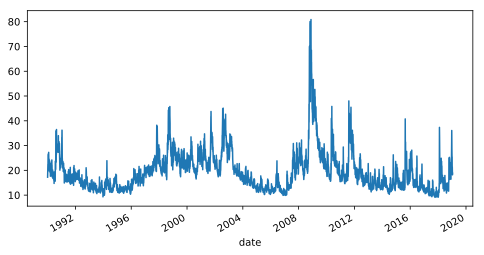

In [55]:
vix_close.vix_close.plot(figsize=(8,4)); #raw vix close scores

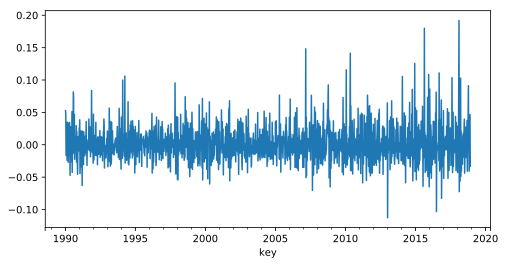

In [56]:
weekly_pct.vix_close.plot(figsize=(8,4)); #%change data

## Test for data stationarity

Test Statistic         -1.431182e+01
p-value                 1.180804e-26
Lags Used               1.000000e+01
Observations Used       1.498000e+03
Critical Value (1%)    -3.434723e+00
Critical Value (5%)    -2.863471e+00
Critical Value (10%)   -2.567798e+00
dtype: float64


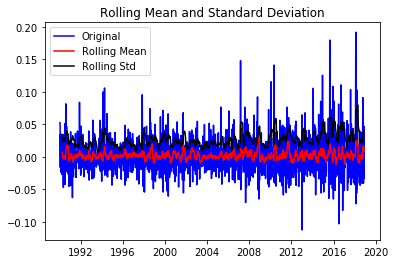

In [19]:
dftest(weekly_pct.vix_close)

## Seasonality / cycles EDA

First looking at autocorrelation and partial autocorrelation plots

In [20]:
import statsmodels.tsa.api as smt

def plots(data, lags=None):
    layout = (1, 3)
    raw  = plt.subplot2grid(layout, (0, 0))
    acf  = plt.subplot2grid(layout, (0, 1))
    pacf = plt.subplot2grid(layout, (0, 2))
    
    data.plot(ax=raw, figsize=(12, 6))
    smt.graphics.plot_acf(data, lags=lags, ax=acf)
    smt.graphics.plot_pacf(data, lags=lags, ax=pacf)
    sns.despine()
    plt.tight_layout()


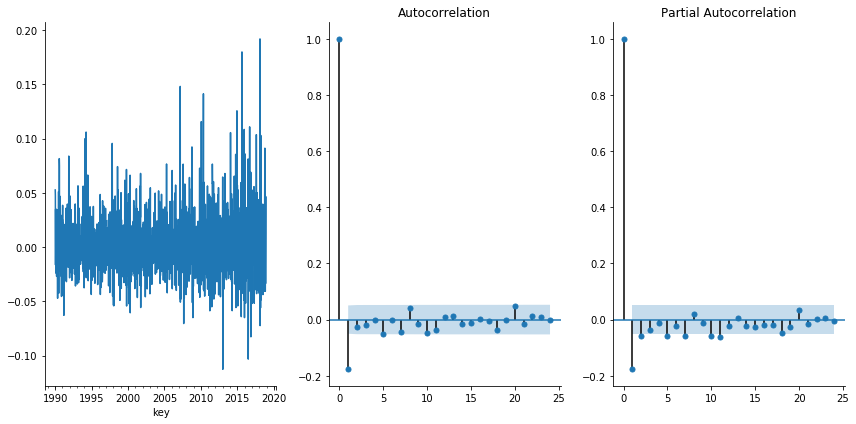

In [21]:
plots(weekly_pct.vix_close, lags=24);


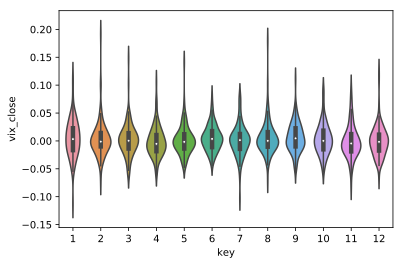

In [60]:
sns.violinplot(x=weekly_pct.index.month,y=weekly_pct.vix_close) #Monday - Friday doesn't matter.

## Code to save nice EDA graph

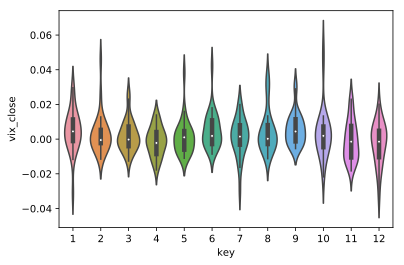

In [44]:
a = sns.violinplot(x=monthly_vix.index.month,y=monthly_vix.vix_close)
figure = a.get_figure()
#figure.savefig('monthly_vix_violin.svg',  bbox_inches='tight')

In [63]:
import statsmodels.api as sm

# fit SARIMA monthly based on helper plots
sar = sm.tsa.statespace.SARIMAX(weekly_pct.vix_close, order=(1,1,0), seasonal_order=(1,0,0,12), trend='c').fit()

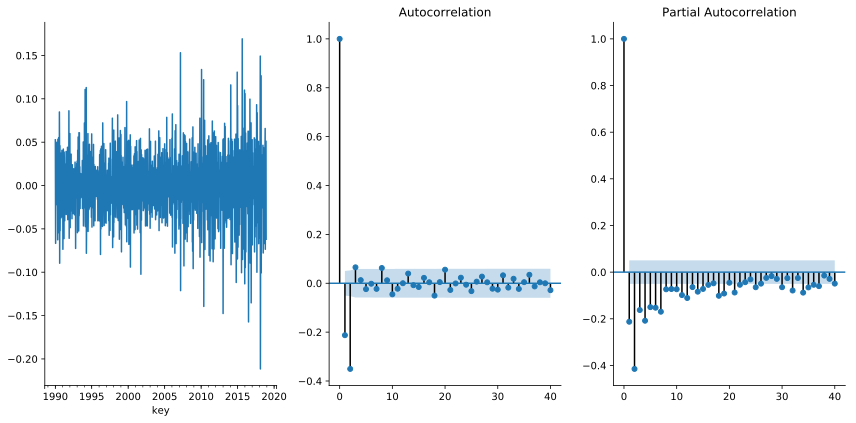

In [64]:
plots(sar.resid, lags=40);

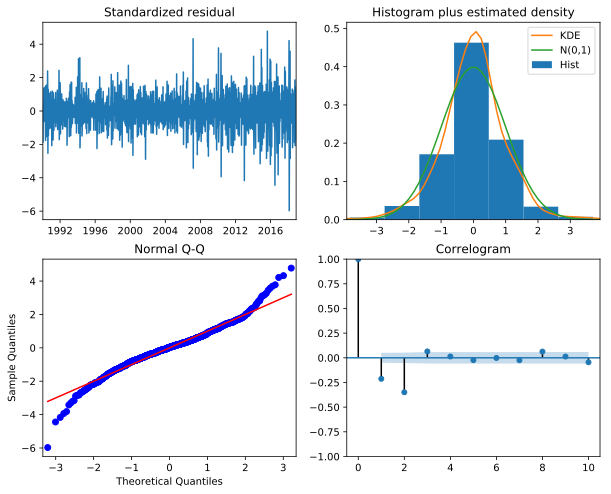

In [65]:
sar.plot_diagnostics(figsize=(10, 8));